# Getting Technical: How to build an Object Detection model using the ImageAI library

## Link: [Analytics Vidhya - Object Detection with ImageAI library](https://www.analyticsvidhya.com/blog/2018/06/understanding-building-object-detection-model-python/)

## 1 - Install ImageAI library

In [0]:
!pip install https://github.com/OlafenwaMoses/ImageAI/releases/download/2.0.1/imageai-2.0.1-py3-none-any.whl

    100% |████████████████████████████████| 143kB 2.3MB/s 


## 2 - Upload test image

### Link: [Test image](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2018/06/I1_2009_09_08_drive_0012_001351-768x223.png)

In [0]:
from google.colab import files

uploaded = files.upload()

Saving image1.png to image1.png


## 3 - Upload model from Drive

### Link: [RetinaNet Pretrained model](https://github.com/OlafenwaMoses/ImageAI/releases/download/1.0/resnet50_coco_best_v2.0.1.h5)

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
model_path = "/content/drive/My Drive/resnet50_coco_best_v2.0.1.h5"
image_path = "/content/image1.png"

## 4 - Running model to object detection - Pedestrian Detection

In [0]:
from imageai.Detection import ObjectDetection
import os

execution_path = os.getcwd()

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath( os.path.join(execution_path , model_path))
detector.loadModel()
custom_objects = detector.CustomObjects(person=True, car=False)
detections = detector.detectCustomObjectsFromImage(input_image=os.path.join(execution_path , image_path), output_image_path=os.path.join(execution_path , "image_new.png"), custom_objects=custom_objects, minimum_percentage_probability=65)


for eachObject in detections:
   print(eachObject["name"] + " : " + eachObject["percentage_probability"] )
   print("--------------------------------")

person : 75.89701414108276
--------------------------------
person : 67.26257801055908
--------------------------------


## 5 - Visualizing the generated image

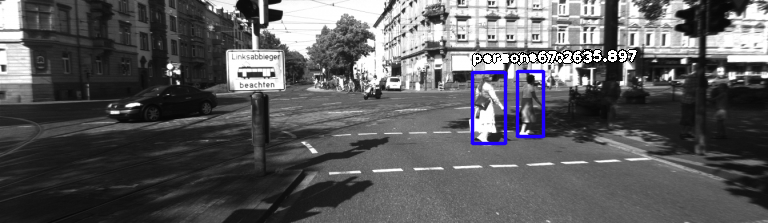

In [0]:
from IPython.display import Image
Image("image_new.png")